In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import datetime
from statsmodels import api as sm

In [2]:
df = pd.read_csv("Train_xyqdbho.csv")

In [3]:
def fill_nan(col):
    df[col] = df[col].fillna(df[col].median())
cols = list(df.columns)
cols.remove('ID')
cols.remove('Park_ID')
cols.remove('Location_Type')
cols.remove('Footfall')
fill_nan(cols)

def degrees_to_cardinal(d):
    dirs = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE",
            "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"]
    numb = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
    ix = int((d + 11.25)/22.5 - 0.02) 
    return numb[ix % 16]


In [4]:
df["Date"] = pd.to_datetime(df["Date"], format='%d-%m-%Y')

In [5]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Cardinal_Direction'] = df['Direction_Of_Wind']
df['Cardinal_Direction'] = df['Cardinal_Direction'].apply(degrees_to_cardinal)
 
df['Weekday'] = df['Date'].dt.weekday

df.describe()

,ID,Park_ID,Direction_Of_Wind,Average_Breeze_Speed,Max_Breeze_Speed,Min_Breeze_Speed,Var1,Average_Atmospheric_Pressure,Max_Atmospheric_Pressure,Min_Atmospheric_Pressure,...,Average_Moisture_In_Park,Max_Moisture_In_Park,Min_Moisture_In_Park,Location_Type,Footfall,Day,Month,Year,Cardinal_Direction,Weekday
count,1.145390e+05,114539.000000,114539.000000,114539.000000,114539.000000,114539.000000,114539.000000,114539.000000,114539.000000,114539.000000,...,114539.000000,114539.000000,114539.000000,114539.000000,114539.000000,114539.000000,114539.000000,114539.000000,114539.000000,114539.000000
mean,3.517595e+06,25.582596,180.150438,34.123024,51.494530,17.211025,17.503000,8332.758074,8356.736561,8307.555060,...,248.010363,283.918508,202.356953,2.630720,1204.217192,15.730345,6.639538,1995.793660,8.978959,3.000463
std,1.189083e+05,8.090592,83.938495,17.152542,21.714298,14.177083,37.153038,65.233167,61.262852,70.275807,...,28.893134,15.635385,46.357712,0.967435,248.385651,8.800655,3.466937,3.260136,3.743229,2.000591
min,3.311712e+06,12.000000,1.000000,3.040000,7.600000,0.000000,0.000000,7982.000000,8037.000000,7890.000000,...,102.000000,141.000000,48.000000,1.000000,310.000000,1.000000,1.000000,1990.000000,1.000000,0.000000
25%,3.414820e+06,18.000000,117.000000,22.040000,38.000000,7.600000,0.000000,8314.000000,8338.000000,8287.000000,...,231.000000,279.000000,171.000000,2.000000,1026.000000,8.000000,4.000000,1993.000000,6.000000,1.000000
50%,3.517039e+06,26.000000,196.000000,30.400000,45.600000,15.200000,0.830000,8335.000000,8358.000000,8311.000000,...,252.000000,288.000000,207.000000,3.000000,1216.000000,16.000000,7.000000,1996.000000,10.000000,3.000000
75%,3.619624e+06,33.000000,237.000000,41.800000,60.800000,22.800000,18.260000,8358.000000,8379.000000,8335.000000,...,270.000000,294.000000,237.000000,3.000000,1402.000000,23.000000,10.000000,1999.000000,12.000000,5.000000
max,3.725639e+06,39.000000,360.000000,154.280000,212.800000,129.200000,1181.090000,8588.000000,8601.000000,8571.000000,...,300.000000,300.000000,300.000000,4.000000,1925.000000,31.000000,12.000000,2001.000000,16.000000,6.000000


In [6]:
test1 = pd.read_csv('Test_pyI9Owa.csv')
from sklearn import preprocessing


def fill_nan(col):
    test1[col] = test1[col].fillna(test1[col].median())
c = list(test1.columns)
c.remove('ID')
c.remove('Park_ID')
c.remove('Location_Type')
fill_nan(c)

#test1 = test1.dropna()
test1["Date"] = pd.to_datetime(test1["Date"], format='%d-%m-%Y')
test1['Day'] = test1['Date'].dt.day
test1['Month'] = test1['Date'].dt.month
test1['Year'] = test1['Date'].dt.year
test1['Cardinal_Direction'] = test1['Direction_Of_Wind']
test1['Cardinal_Direction'] = test1['Cardinal_Direction'].apply(degrees_to_cardinal)
test1['Weekday'] = test1['Date'].dt.weekday



test1.describe()

,ID,Park_ID,Direction_Of_Wind,Average_Breeze_Speed,Max_Breeze_Speed,Min_Breeze_Speed,Var1,Average_Atmospheric_Pressure,Max_Atmospheric_Pressure,Min_Atmospheric_Pressure,...,Max_Ambient_Pollution,Average_Moisture_In_Park,Max_Moisture_In_Park,Min_Moisture_In_Park,Location_Type,Day,Month,Year,Cardinal_Direction,Weekday
count,3.942000e+04,39420.000000,39420.000000,39420.000000,39420.000000,39420.000000,39420.000000,39420.000000,39420.000000,39420.000000,...,39420.000000,39420.000000,39420.000000,39420.000000,39420.000000,39420.000000,39420.000000,39420.000000,39420.000000,39420.000000
mean,3.798676e+06,25.740741,179.844825,34.259824,51.739767,17.292410,17.028338,8333.314663,8357.579807,8307.881253,...,312.379604,246.121157,284.966514,198.497260,2.592593,15.719178,6.519178,2003.499315,8.966667,2.998630
std,4.214710e+04,8.126843,82.795123,17.274705,21.992845,14.260411,36.026733,62.990559,59.410852,67.564674,...,28.464899,26.888685,15.411950,42.873578,0.952951,8.794134,3.446947,1.117435,3.695610,1.998312
min,3.725712e+06,12.000000,1.000000,3.040000,7.600000,0.000000,0.000000,7996.000000,8006.000000,7969.000000,...,16.000000,90.000000,129.000000,48.000000,1.000000,1.000000,1.000000,2002.000000,1.000000,0.000000
25%,3.762194e+06,18.000000,124.000000,22.040000,38.000000,7.600000,0.000000,8311.000000,8338.000000,8287.000000,...,304.000000,228.000000,279.000000,168.000000,2.000000,8.000000,4.000000,2002.750000,6.000000,1.000000
50%,3.798676e+06,26.000000,194.000000,30.400000,45.600000,15.200000,0.830000,8335.000000,8358.000000,8311.000000,...,316.000000,249.000000,291.000000,201.000000,3.000000,16.000000,7.000000,2003.500000,10.000000,3.000000
75%,3.835157e+06,33.000000,234.000000,41.800000,60.800000,22.800000,18.260000,8358.000000,8379.000000,8331.000000,...,332.000000,267.000000,294.000000,231.000000,3.000000,23.000000,10.000000,2004.000000,11.000000,5.000000
max,3.871639e+06,39.000000,360.000000,144.400000,220.400000,121.600000,1092.280000,8567.000000,8577.000000,8543.000000,...,356.000000,300.000000,300.000000,300.000000,4.000000,31.000000,12.000000,2005.000000,16.000000,6.000000


In [7]:
dl = pd.get_dummies(df['Location_Type'], prefix='loc')
df = pd.concat([df, dl], axis=1)

dl_test = pd.get_dummies(test1['Location_Type'], prefix='loc')
test1 = pd.concat([test1, dl_test], axis=1)

In [8]:
dp = pd.get_dummies(df['Park_ID'], prefix='p')
df = pd.concat([df, dp], axis=1)

dp_test = pd.get_dummies(test1['Park_ID'], prefix='p')
test1 = pd.concat([test1, dp_test], axis=1)

In [9]:
df_c = pd.get_dummies(df['Cardinal_Direction'], prefix='card')
df = pd.concat([df, df_c], axis=1)

test_c = pd.get_dummies(test1['Cardinal_Direction'], prefix='card')
test1 = pd.concat([test1, test_c], axis=1)

In [10]:
df['Average_pollution'] = (df['Min_Ambient_Pollution'] + df['Max_Ambient_Pollution']) / 2
test1['Average_pollution'] = (test1['Min_Ambient_Pollution'] + test1['Max_Ambient_Pollution']) / 2

In [11]:
# df_mm = pd.get_dummies(df['Min_Breeze_Speed'], prefix='mm')
# df = pd.concat([df, df_mm], axis=1)

# test_mm = pd.get_dummies(test1['Min_Breeze_Speed'], prefix='mm')
# test1 = pd.concat([test1, test_mm], axis=1)

In [12]:
df.columns

Index(['ID', 'Park_ID', 'Date', 'Direction_Of_Wind', 'Average_Breeze_Speed',
       'Max_Breeze_Speed', 'Min_Breeze_Speed', 'Var1',
       'Average_Atmospheric_Pressure', 'Max_Atmospheric_Pressure',
       'Min_Atmospheric_Pressure', 'Min_Ambient_Pollution',
       'Max_Ambient_Pollution', 'Average_Moisture_In_Park',
       'Max_Moisture_In_Park', 'Min_Moisture_In_Park', 'Location_Type',
       'Footfall', 'Day', 'Month', 'Year', 'Cardinal_Direction', 'Weekday',
       'loc_1', 'loc_2', 'loc_3', 'loc_4', 'p_12', 'p_13', 'p_14', 'p_15',
       'p_16', 'p_17', 'p_18', 'p_19', 'p_20', 'p_21', 'p_22', 'p_23', 'p_24',
       'p_25', 'p_26', 'p_27', 'p_28', 'p_29', 'p_30', 'p_31', 'p_32', 'p_33',
       'p_34', 'p_35', 'p_36', 'p_37', 'p_38', 'p_39', 'card_1', 'card_2',
       'card_3', 'card_4', 'card_5', 'card_6', 'card_7', 'card_8', 'card_9',
       'card_10', 'card_11', 'card_12', 'card_13', 'card_14', 'card_15',
       'card_16', 'Average_pollution'],
      dtype='object')

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

features = list(df.columns)
features.remove('ID')
features.remove('Footfall')
features.remove('Date')
features.remove('Park_ID')
features.remove('Year')
# features.remove('Day')
features.remove('Min_Atmospheric_Pressure')
features.remove('Max_Atmospheric_Pressure')
features.remove('Average_Atmospheric_Pressure')
# features.remove('Max_Breeze_Speed')
# features.remove('Min_Ambient_Pollution')
# features.remove('Max_Ambient_Pollution')
# features.remove('Min_Moisture_In_Park')
features.remove('Max_Moisture_In_Park')
# features.remove('Average_Moisture_In_Park')
features.remove('Weekday')
features.remove('Cardinal_Direction')
features.remove('Location_Type')
features.remove('p_19')


#rf = RandomForestRegressor(random_state=1, n_estimators=250, min_samples_split=8, min_samples_leaf=4)

# rf = GradientBoostingRegressor(random_state=0, n_estimators=1500, min_samples_split=8, min_samples_leaf=4, learning_rate=0.1)

rf = xgb.XGBRegressor(n_estimators=2000)

#rf = ExtraTreesRegressor(n_estimators=500, min_samples_leaf=4, min_samples_split=8, random_state=1)

# rf1 = MLPRegressor(max_iter=500, random_state=1, hidden_layer_sizes=1000)

# train = df[:91631]
# test = df[91631:]
# rf.fit(train[features], train['Footfall'])
# predictions = rf.predict(test[features])
# mse = mean_squared_error(test['Footfall'], predictions)
# rmse = mse ** (1/2)
# rmse

rf.fit(df[features], df['Footfall'])
predictions = rf.predict(test1[features])
predictions = predictions.astype(int)
sub = pd.DataFrame({'Footfall': predictions, 'ID': test1['ID']})
sub.to_csv('./saru.csv', index=False)

ValueError: tree must be Booster, XGBModel or dict instance

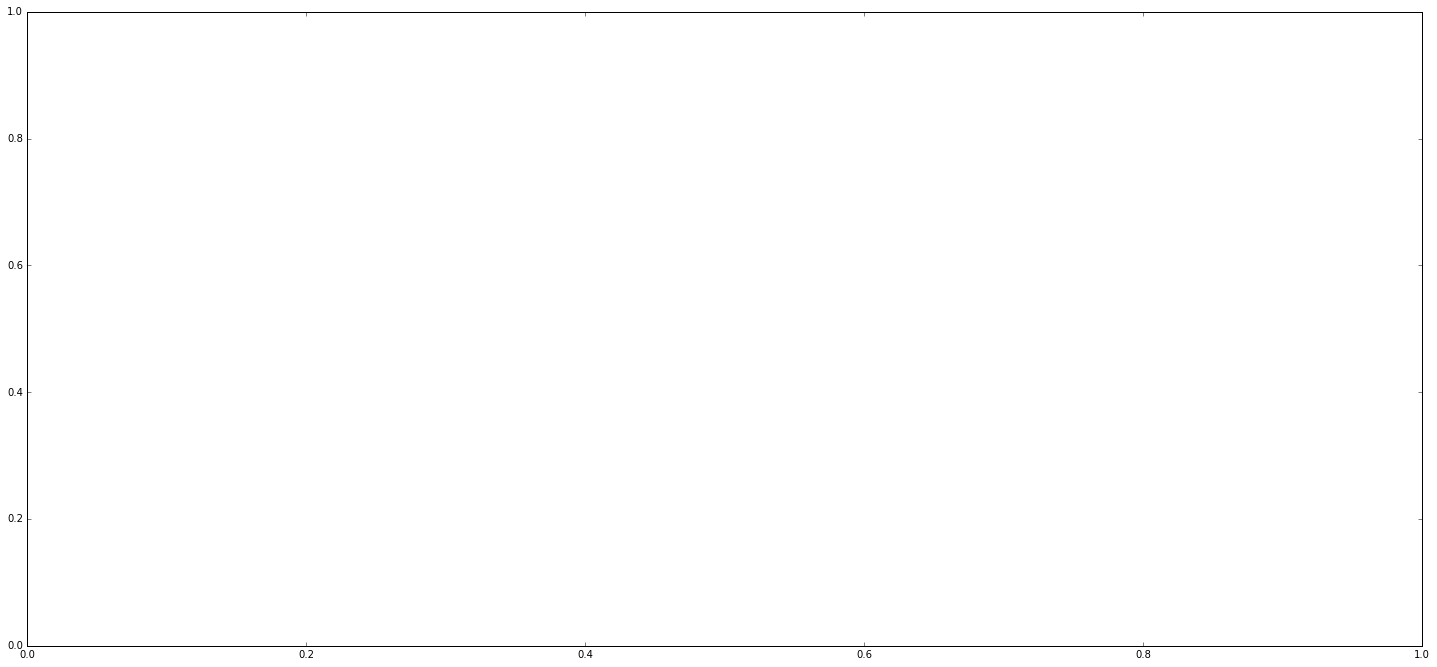

In [14]:
# Code for generalized additive linear model

# from pyearth import Earth

# features = list(df.columns)
# features.remove('ID')
# features.remove('Footfall')
# features.remove('Date')
# features.remove('Park_ID')

# mars_model = Earth(smooth=True, allow_missing=True)
# mars_model.fit(df[features], df['Footfall'])

# print(mars_model.trace())
# print(mars_model.summary())
# a
# y_hat = mars_model.predict(test1[features])
# y_hat = y_hat.astype(int)
# sub = pd.DataFrame({'Footfall': y_hat, 'ID': test1['ID']})
# sub.to_csv('./saru1.csv', index=False)
fig = plt.figure(figsize=(25,25))
ax1 = fig.add_subplot(2,1,1)
xgb.plot_importance(rf,ax=ax1, height=2, importance_type='gain')
features